# Data 

## Imports 

In [1]:
import os
import pandas as pd
import numpy as np

## Merging data from 3 csvs

In [2]:
import pandas as pd

# Load the CSV files
df_ss = pd.read_csv('spreadspoke_scores.csv')
df_teams = pd.read_csv('nfl_teams.csv')
df_stads = pd.read_csv('nfl_stadiums.csv', encoding='ISO-8859-1')

df_teams = df_teams.rename(columns={'team_name':'team_home'})
merged_df = pd.merge(df_teams, df_ss, on='team_home', how='inner')# Print the column names of both DataFrames

df_stads = df_stads.rename(columns={'stadium_name': 'stadium'})
df = pd.merge(merged_df, df_stads, on='stadium', how='inner')

## Schedule date transformed to date type, sorted df by schedule date
df['schedule_date'] = pd.to_datetime(df['schedule_date'], format='%m/%d/%Y', errors='coerce')
df = df.sort_values(by='schedule_date').reset_index(drop=True)

## This value should be numeric but is object type
df['over_under_line'] = pd.to_numeric(df['over_under_line'], errors='coerce')


df.tail()

team_home team_name_short team_id team_id_pfr team_conference  \
14067  Indianapolis Colts           Colts     IND         CLT             AFC   
14068       New York Jets            Jets     NYJ         NYJ             NFC   
14069    Baltimore Ravens          Ravens     BAL         RAV             AFC   
14070   Green Bay Packers         Packers      GB         GNB             NFC   
14071    Tennessee Titans          Titans     TEN         OTI             AFC   

      team_division team_conference_pre2002 team_division_pre2002  \
14067     AFC South                     AFC              AFC East   
14068      AFC East                     NFC              AFC East   
14069     AFC North                     AFC           AFC Central   
14070     NFC North                     NFC           NFC Central   
14071     AFC South                     AFC           AFC Central   

      schedule_date  schedule_season  ... stadium_weather_station_zipcode  \
14067    2025-01-05             2024  ...                           46225   
14068    2025-01-05             2024  ...                            7073   
14069    2025-01-05             2024  ...                           21230   
14070    2025-01-05             2024  ...                           54304   
14071    2025-01-05             2024  ...                           37213   

       stadium_weather_type  stadium_capacity  stadium_surface  \
14067                indoor            63,000        FieldTurf   
14068                  cold            82,500        FieldTurf   
14069              moderate            71,008        FieldTurf   
14070                  cold            80,735            Grass   
14071              moderate            69,143            Grass   

      stadium_weather_station  \
14067             US1INMR0076   
14068             USW00014734   
14069             USW00093721   
14070             USW00014898   
14071             USW00013897   

                            stadium_weather_station_name  stadium_latitude  \
14067                        INDIANAPOLIS 6.8 NNE, IN US         39.760056   
14068        NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US         40.813528   
14069  BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US         39.278056   
14070  GREEN BAY AUSTIN STRAUBEL INTERNATIONAL AIRPOR...         44.501389   
14071             NASHVILLE INTERNATIONAL AIRPORT, TN US         36.166389   

       stadium_longitude stadium_azimuthangle  stadium_elevation  
14067         -86.162806                 26.6              227.1  
14068         -74.074361                345.5                2.1  
14069         -76.622778                289.5               47.5  
14070         -88.062222                  0.0              209.4  
14071         -86.771389                334.6              182.9  

[5 rows x 39 columns]

## Object Data

In [3]:
df_cat = df.select_dtypes(include=['object', 'category'])
df_cat = df_cat.fillna('Unknown')
df_cat.drop(columns=['team_name_short', 'team_id', 'team_id_pfr','stadium_address','stadium_weather_station_zipcode','stadium_weather_station_name','stadium_weather_station'], inplace=True)  ### IRRELEVANT
df_cat.dtypes


team_home                  object
team_conference            object
team_division              object
team_conference_pre2002    object
team_division_pre2002      object
schedule_week              object
team_away                  object
team_favorite_id           object
stadium                    object
weather_detail             object
stadium_location           object
stadium_type               object
stadium_weather_type       object
stadium_capacity           object
stadium_surface            object
dtype: object

## Float Data

In [4]:
df_num = df.select_dtypes(include=['float64'])
df_num[df_num.columns] = df_num.fillna(df_num.mean())
df_num.head()

score_home  score_away  spread_favorite  over_under_line  \
0        14.0        23.0        -5.372946        42.282329   
1        45.0         7.0        -5.372946        42.282329   
2        27.0         7.0        -5.372946        42.282329   
3        14.0        19.0        -5.372946        42.282329   
4        31.0         0.0        -5.372946        42.282329   

   weather_temperature  weather_wind_mph  weather_humidity  stadium_open  \
0                 83.0               6.0              71.0   1946.000000   
1                 81.0               7.0              70.0   1978.466085   
2                 70.0               7.0              82.0   1978.466085   
3                 82.0              11.0              78.0   1946.000000   
4                 77.0               6.0              82.0   1978.466085   

   stadium_close  stadium_latitude  stadium_longitude  stadium_azimuthangle  \
0    1986.000000         25.790500         -80.316300            192.485631   
1    2002.689877         38.021551         -89.763382            192.485631   
2    2002.689877         38.021551         -89.763382            192.485631   
3    1986.000000         25.790500         -80.316300            192.485631   
4    2002.689877         38.021551         -89.763382            192.485631   

   stadium_elevation  
0           8.800000  
1         187.972944  
2         187.972944  
3           8.800000  
4         187.972944

## Boolean Data

In [5]:
df_bool = df.select_dtypes(include=[bool]).astype(int)
df_bool


schedule_playoff  stadium_neutral
0                     0                0
1                     0                0
2                     0                0
3                     0                0
4                     0                0
...                 ...              ...
14067                 0                0
14068                 0                0
14069                 0                0
14070                 0                0
14071                 0                0

[14072 rows x 2 columns]

## Integer Data

In [6]:
df_int = df.select_dtypes(include=['int64'])
df_int


schedule_season
0                 1966
1                 1966
2                 1966
3                 1966
4                 1966
...                ...
14067             2024
14068             2024
14069             2024
14070             2024
14071             2024

[14072 rows x 1 columns]

## cleaned Data

In [7]:
nfl1 = pd.concat([df_cat, df_num], axis=1)
nfl2 = pd.concat([ df_int, df_bool],axis=1)
nfl = pd.concat([nfl1,nfl2],axis=1)
nfl['score_home'].isna().sum()

0

# Visualized Data

## Violin Plot

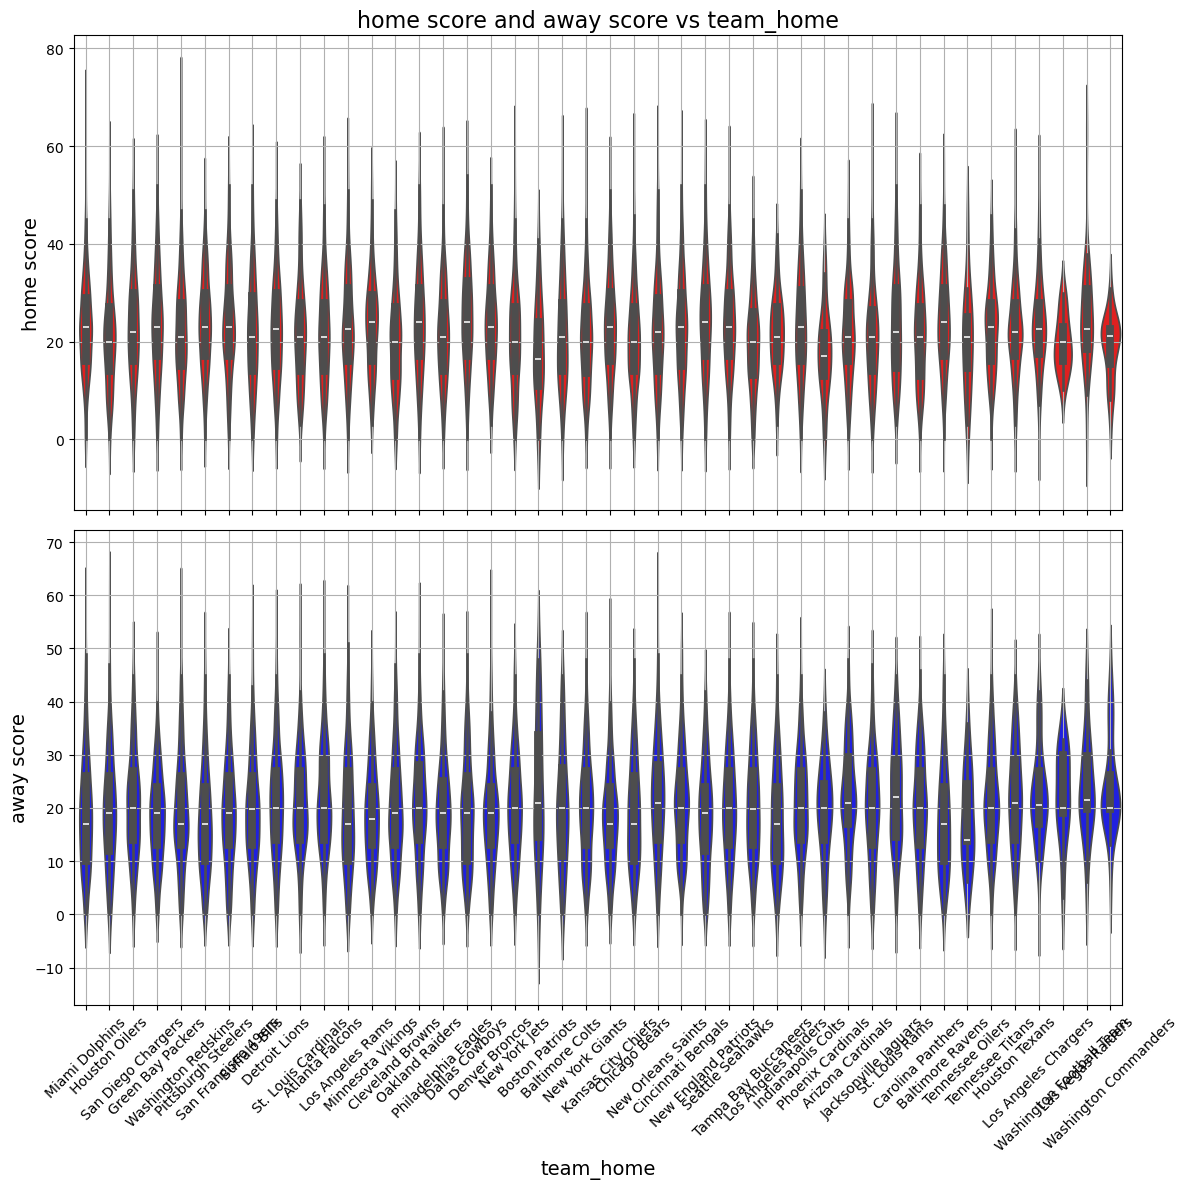

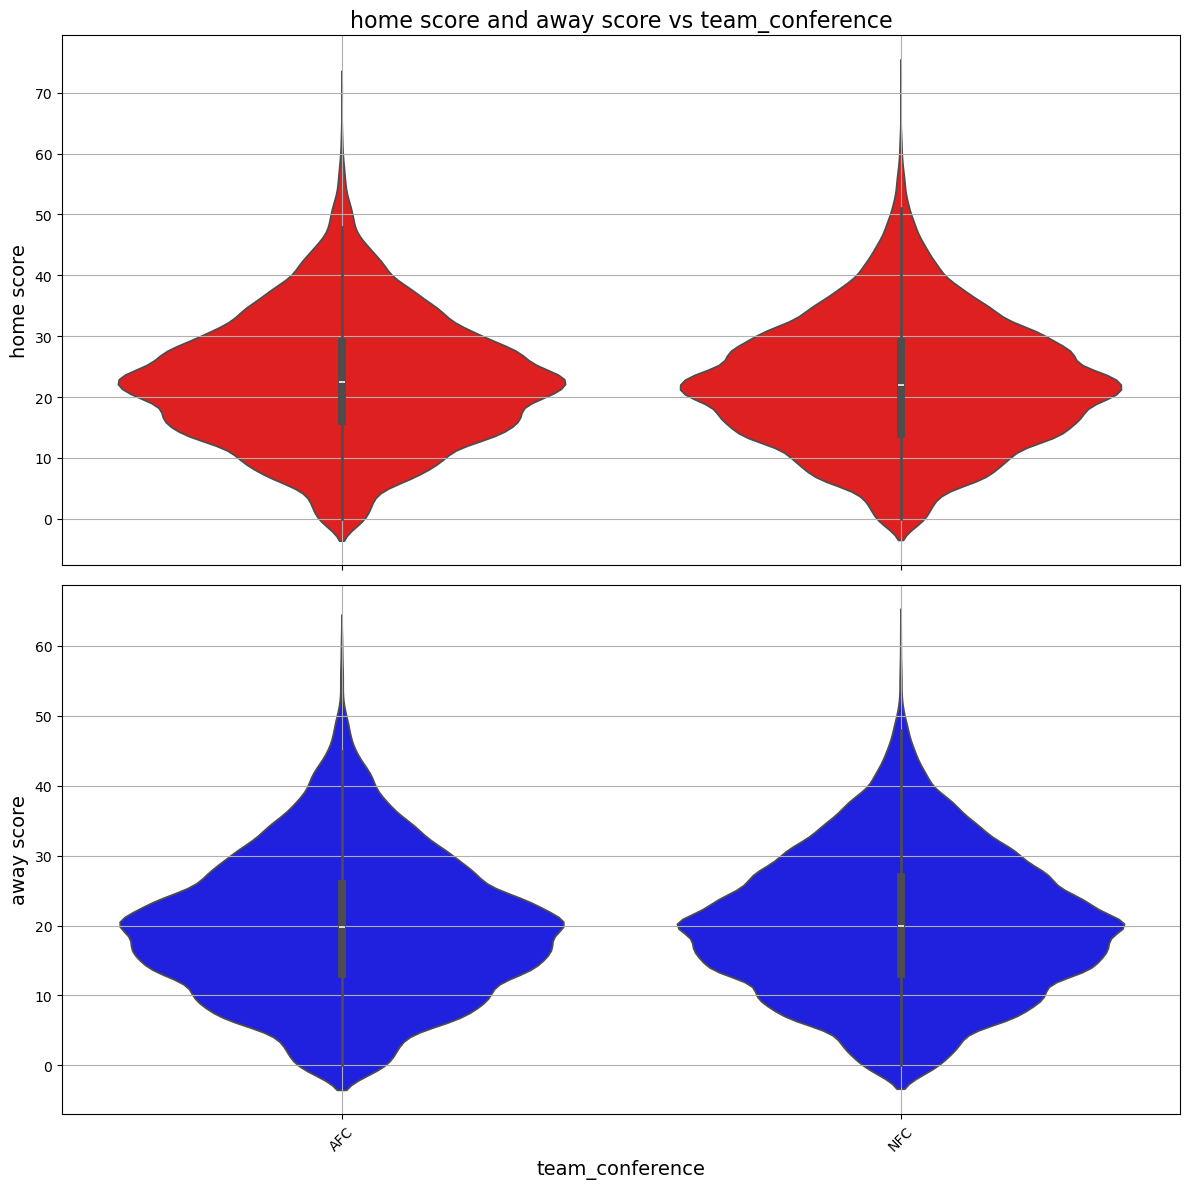

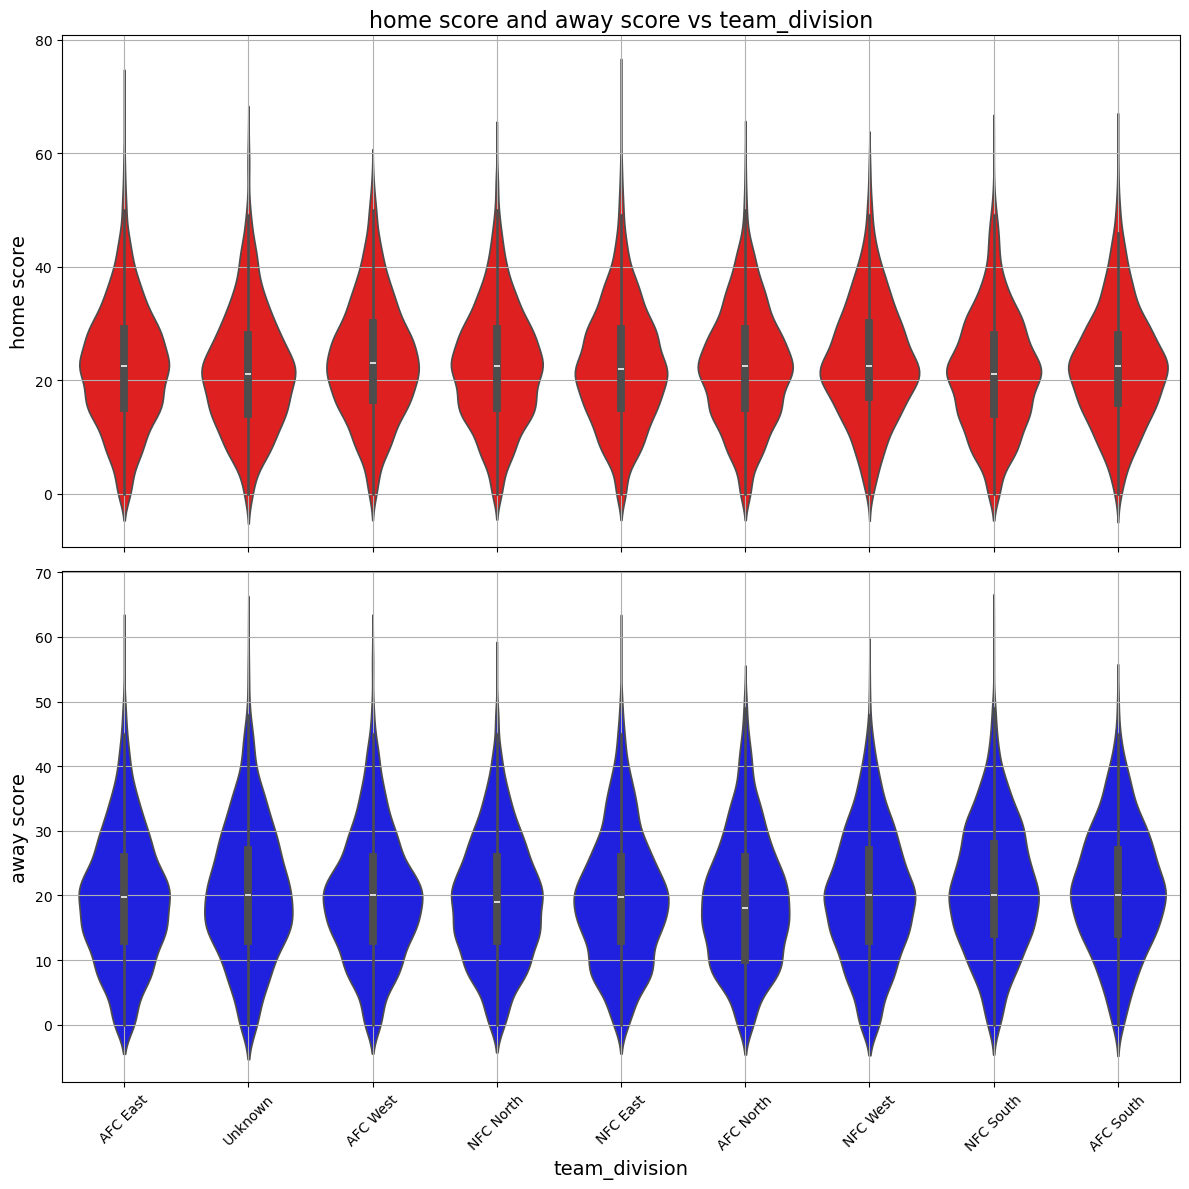

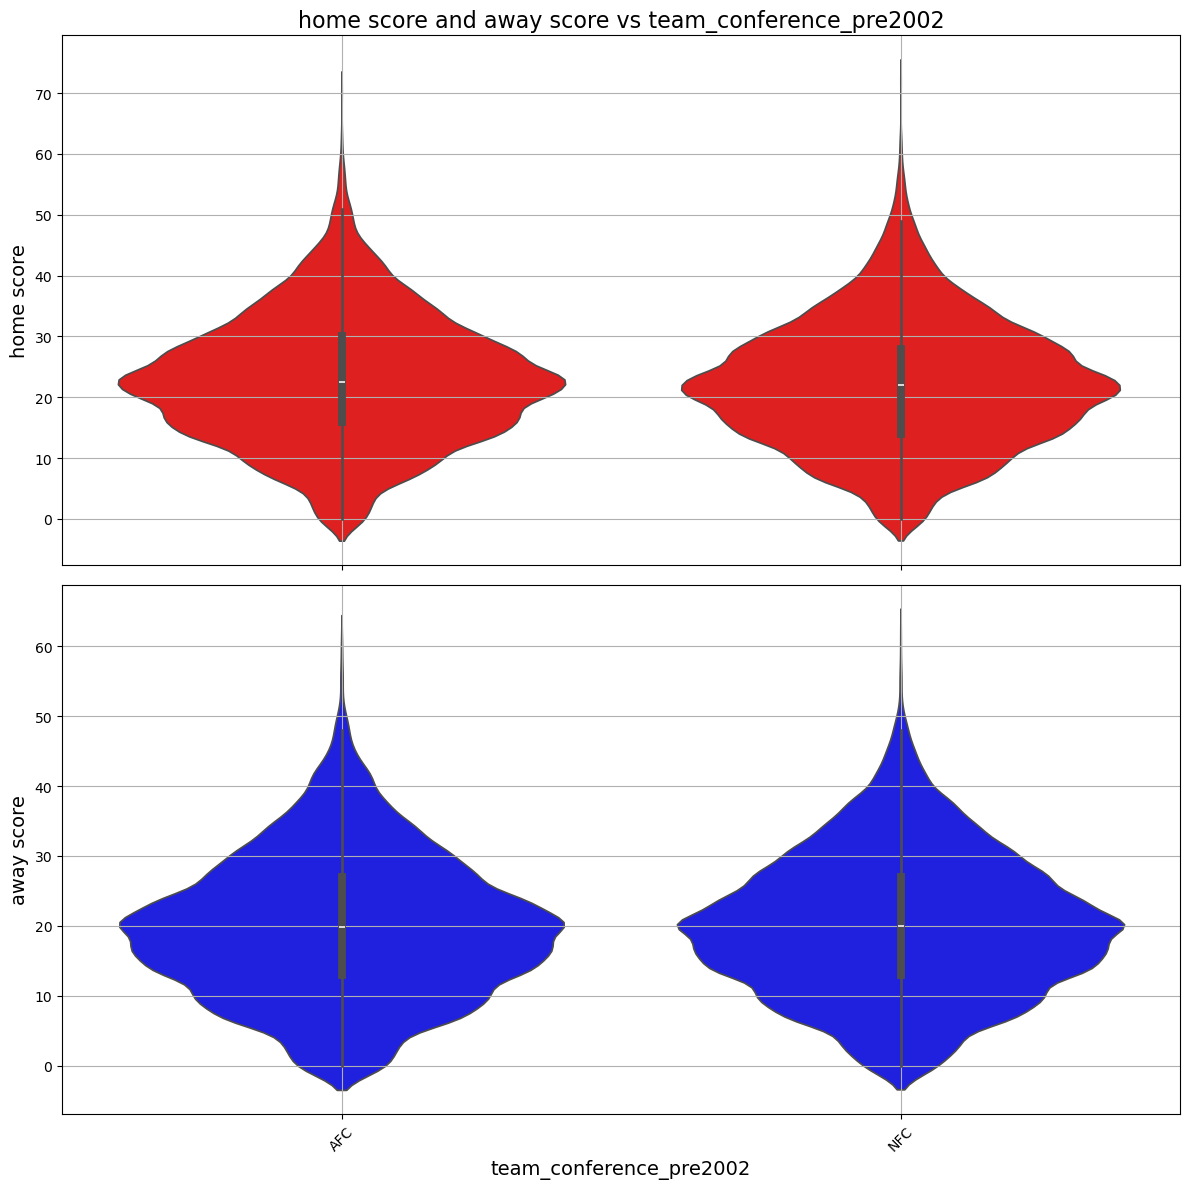

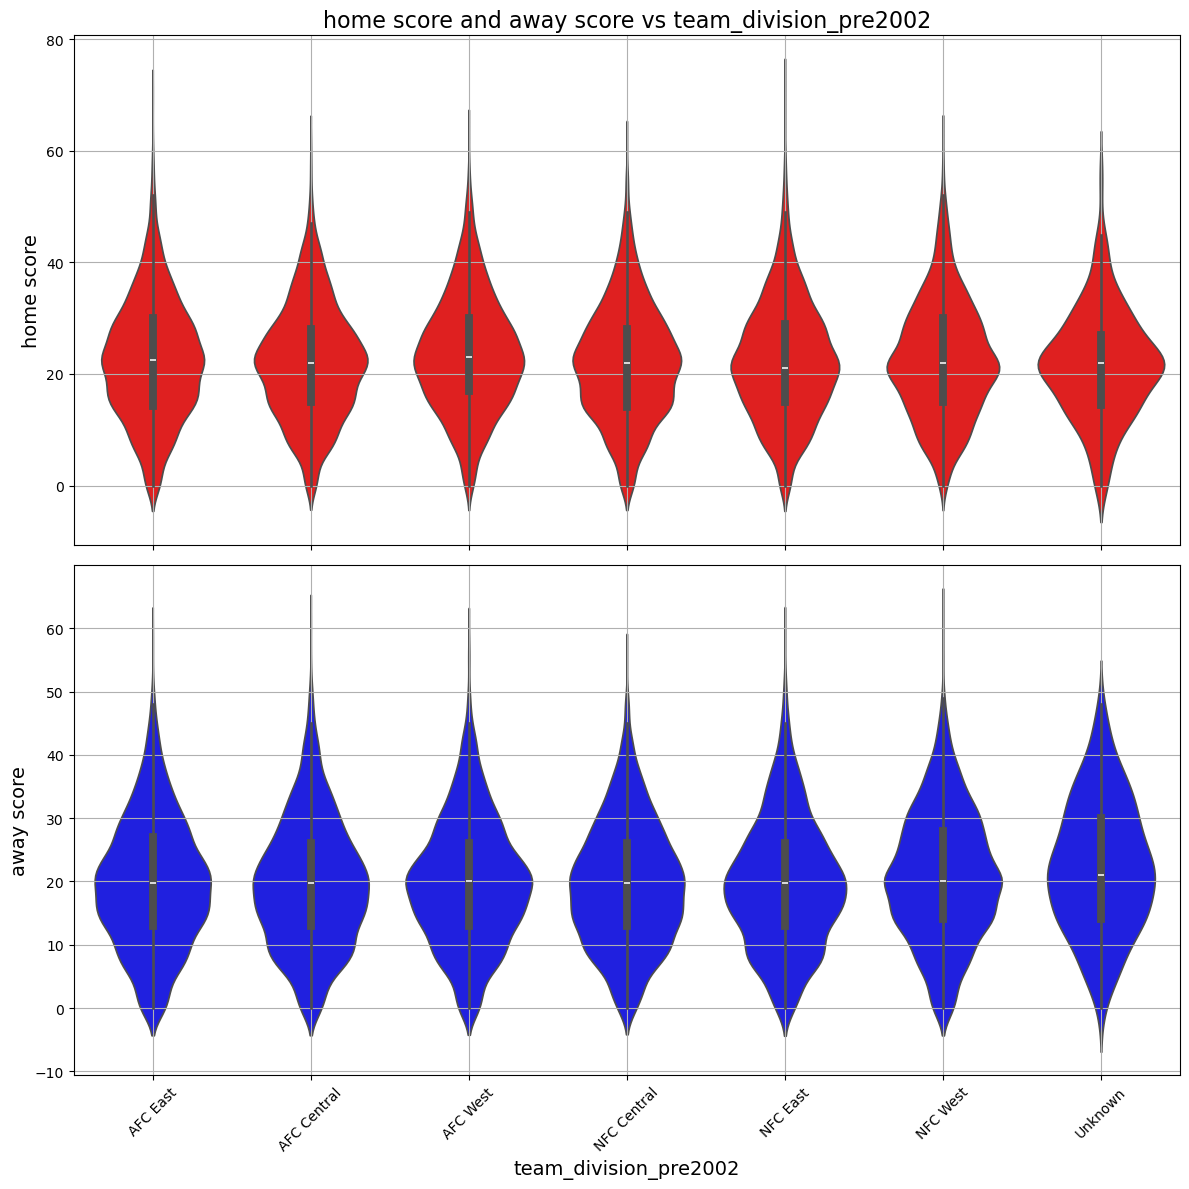

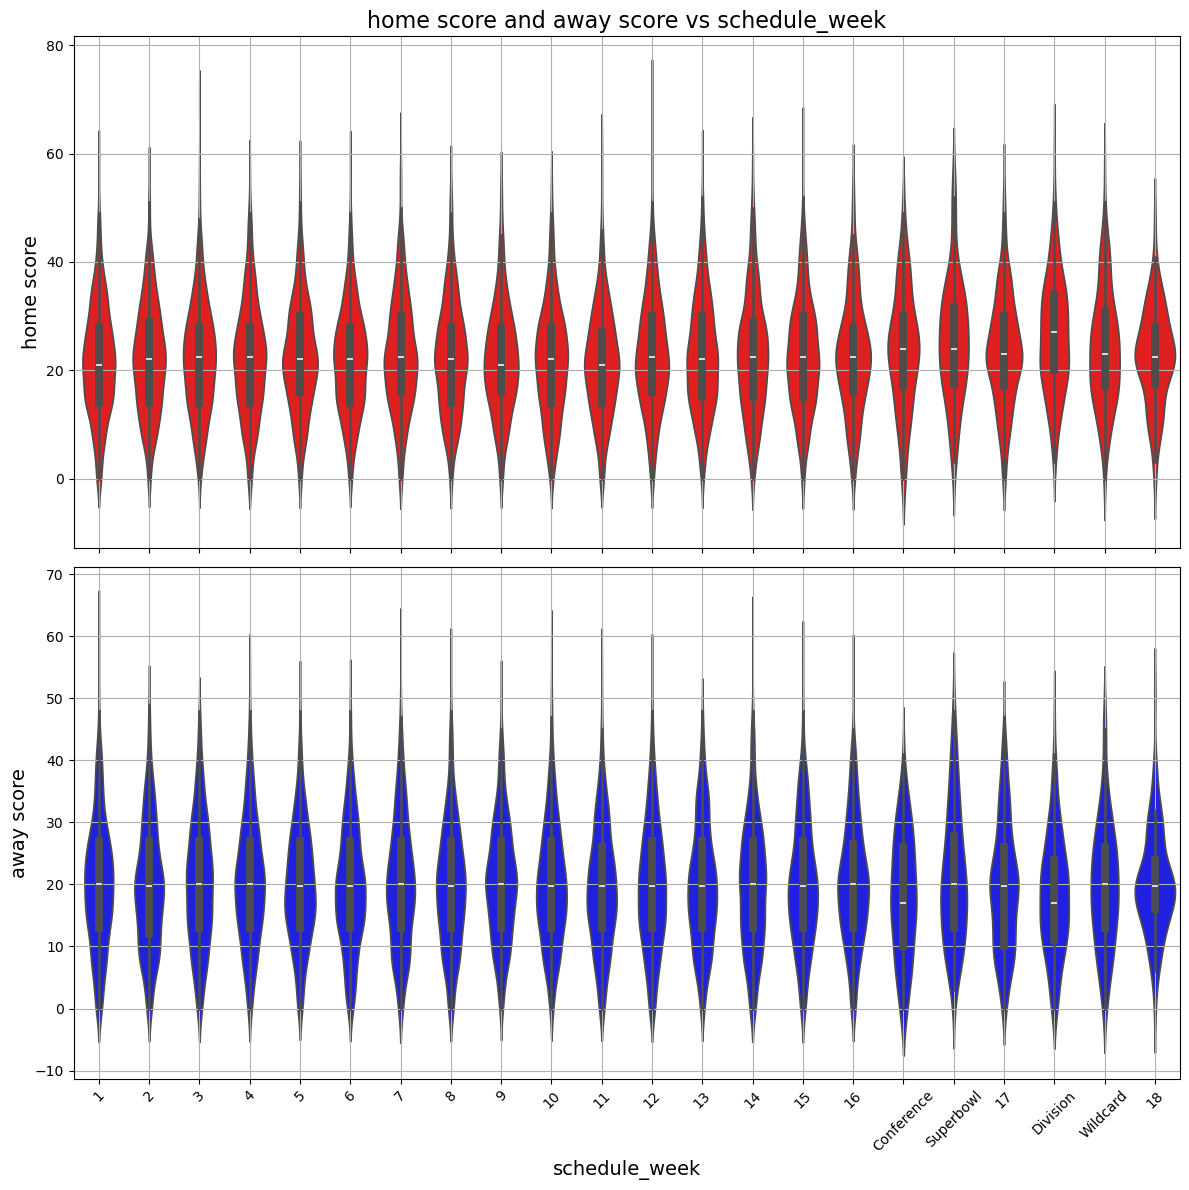

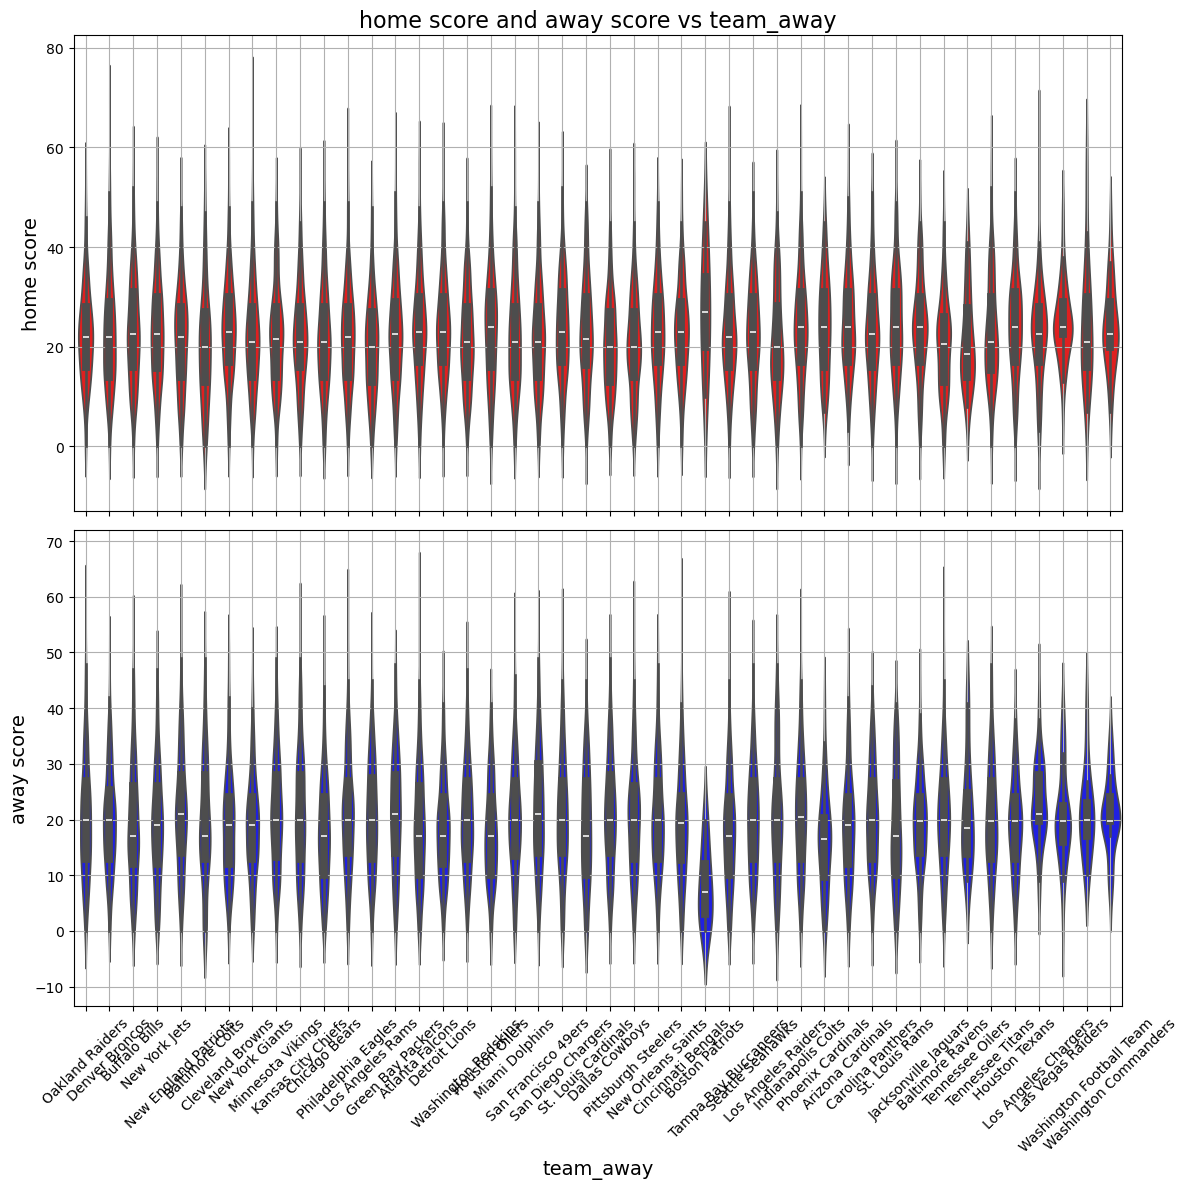

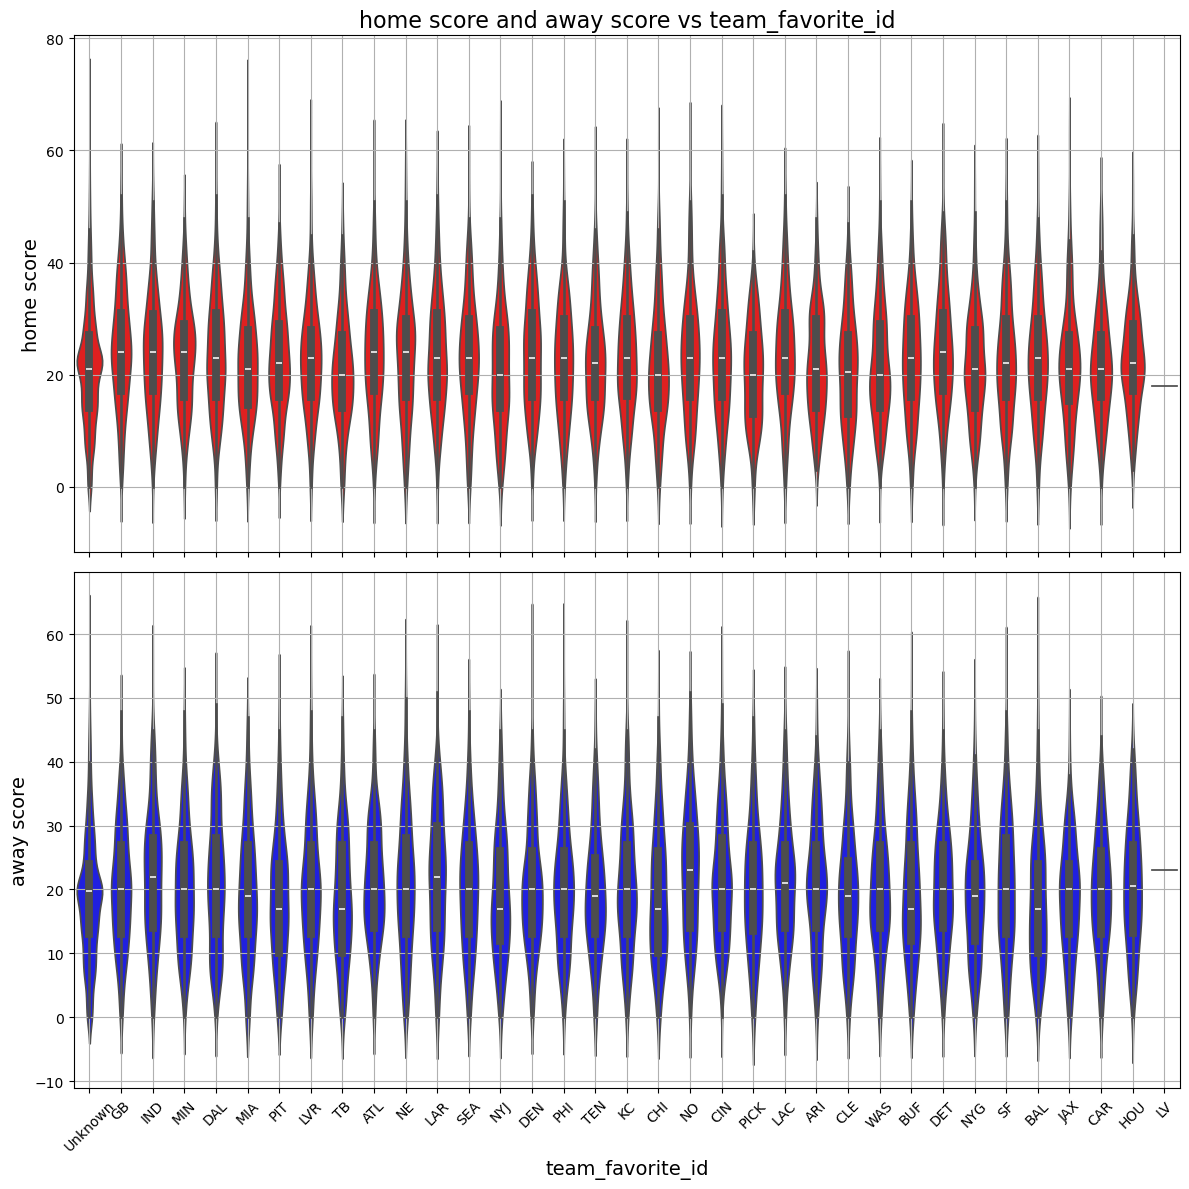

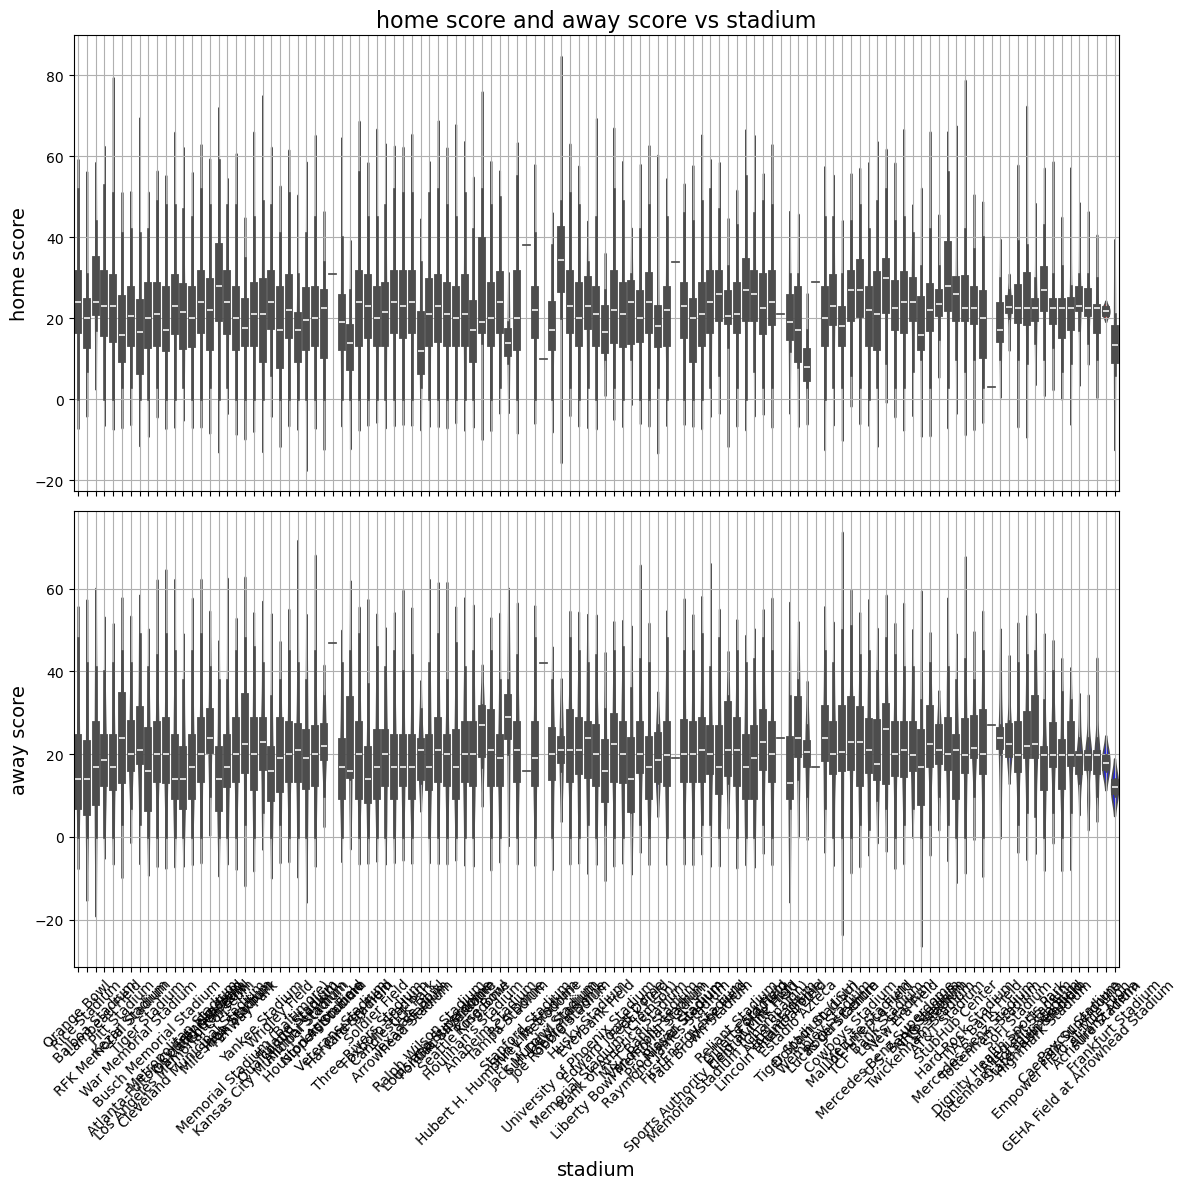

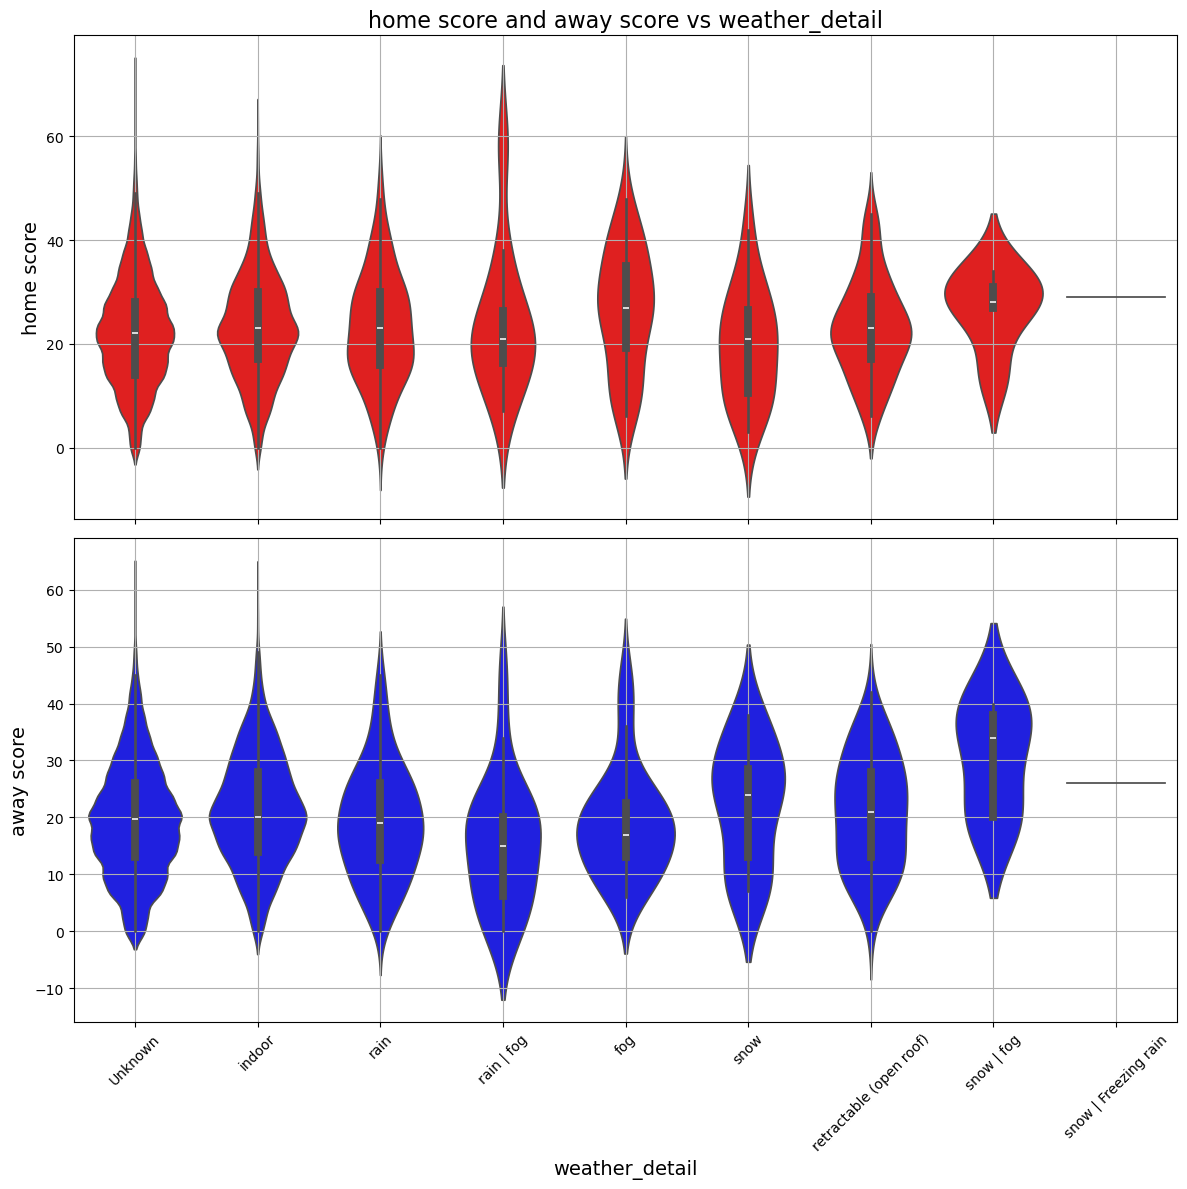

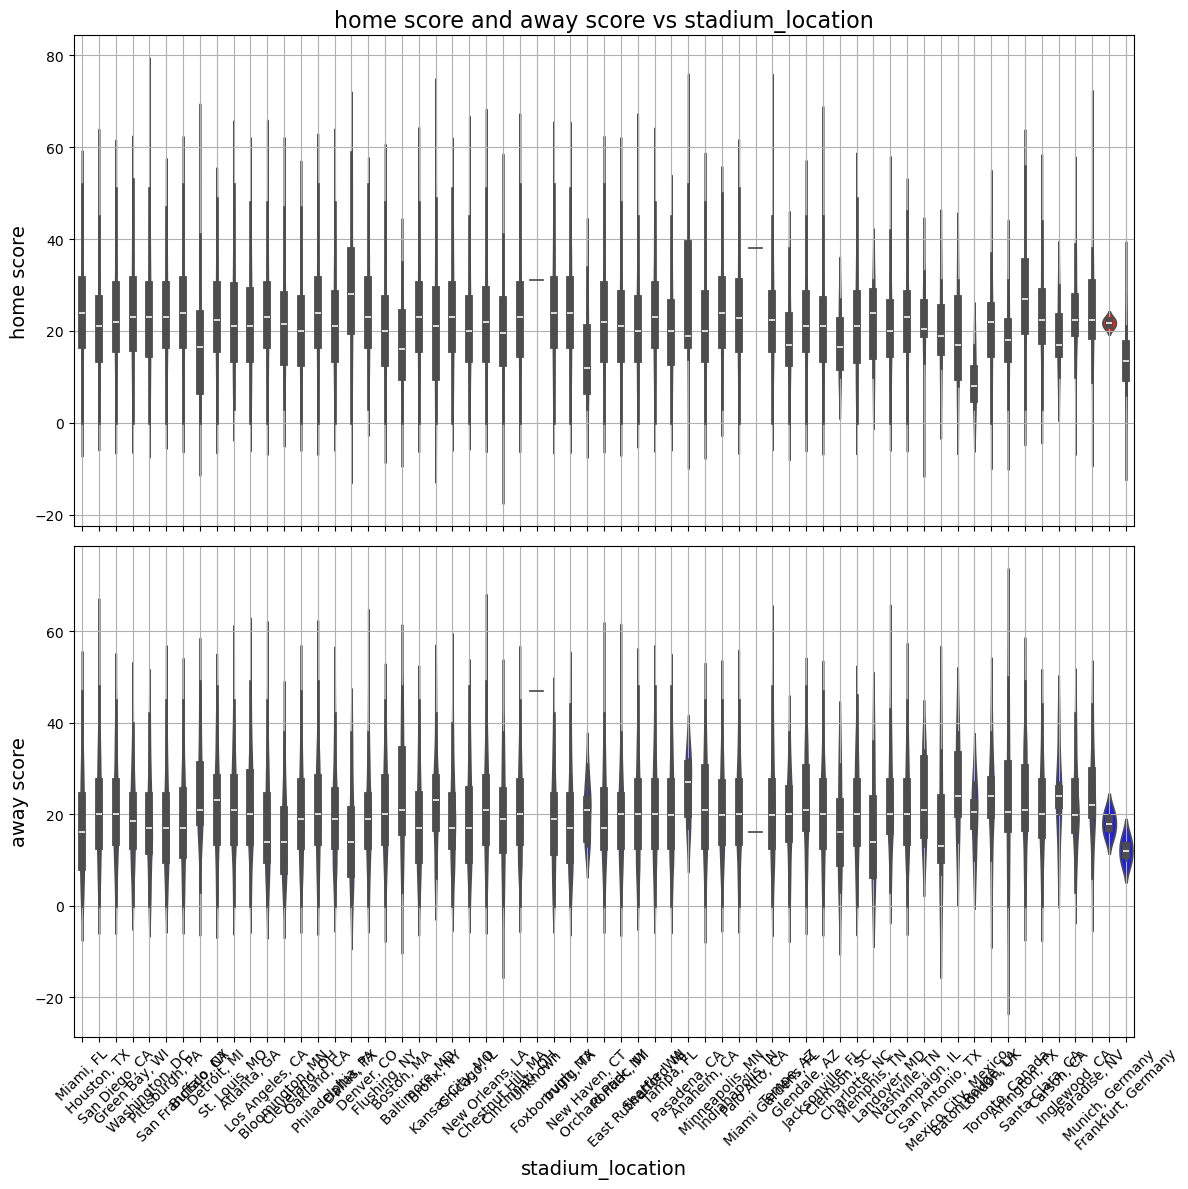

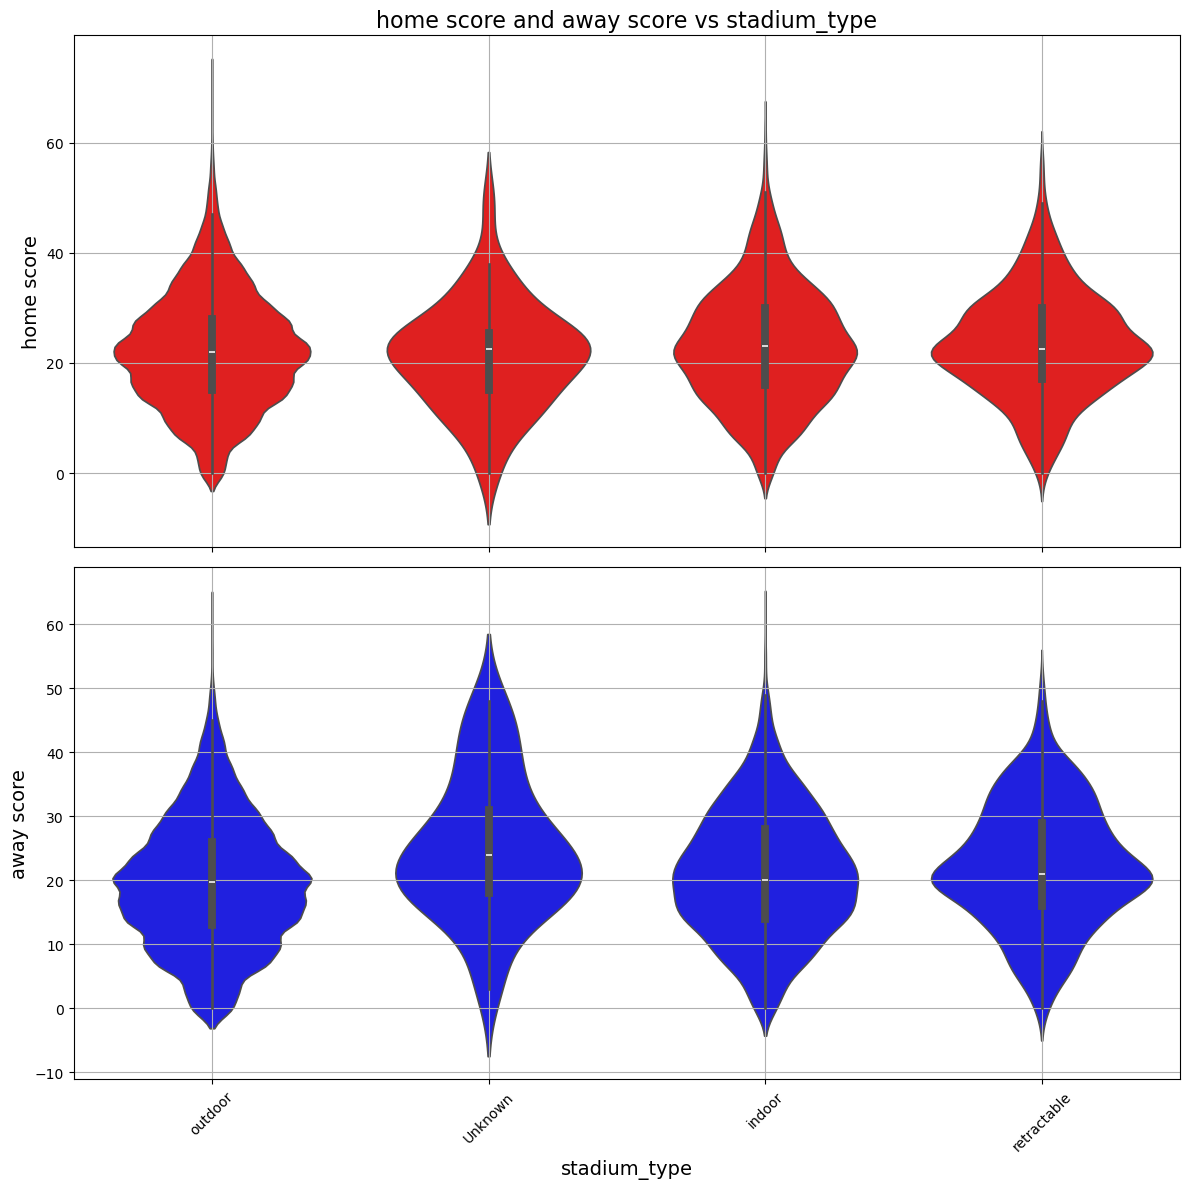

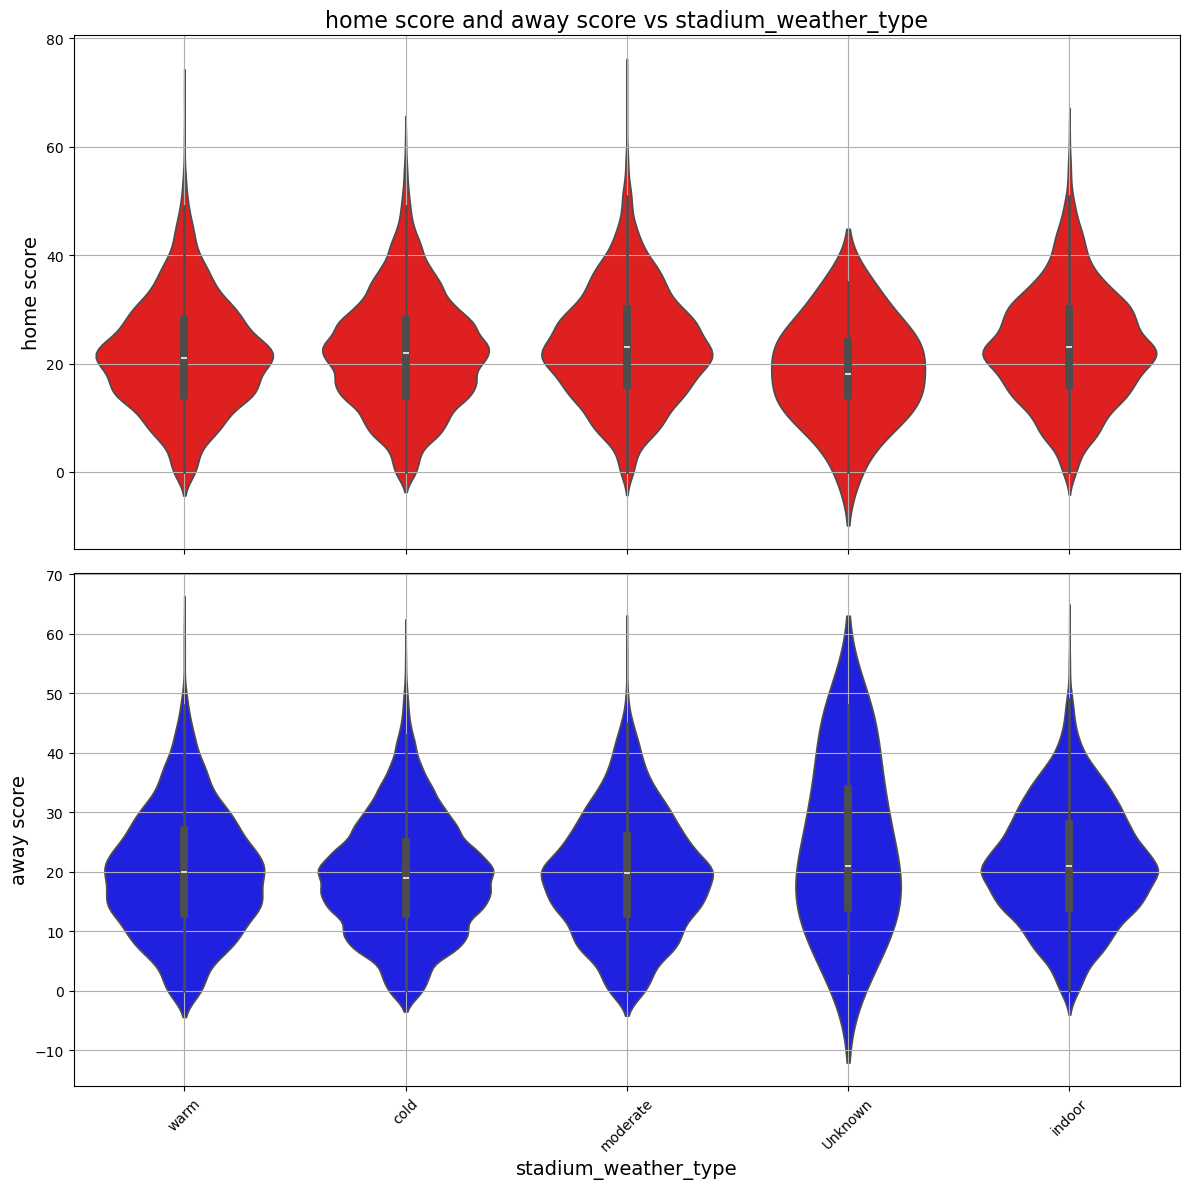

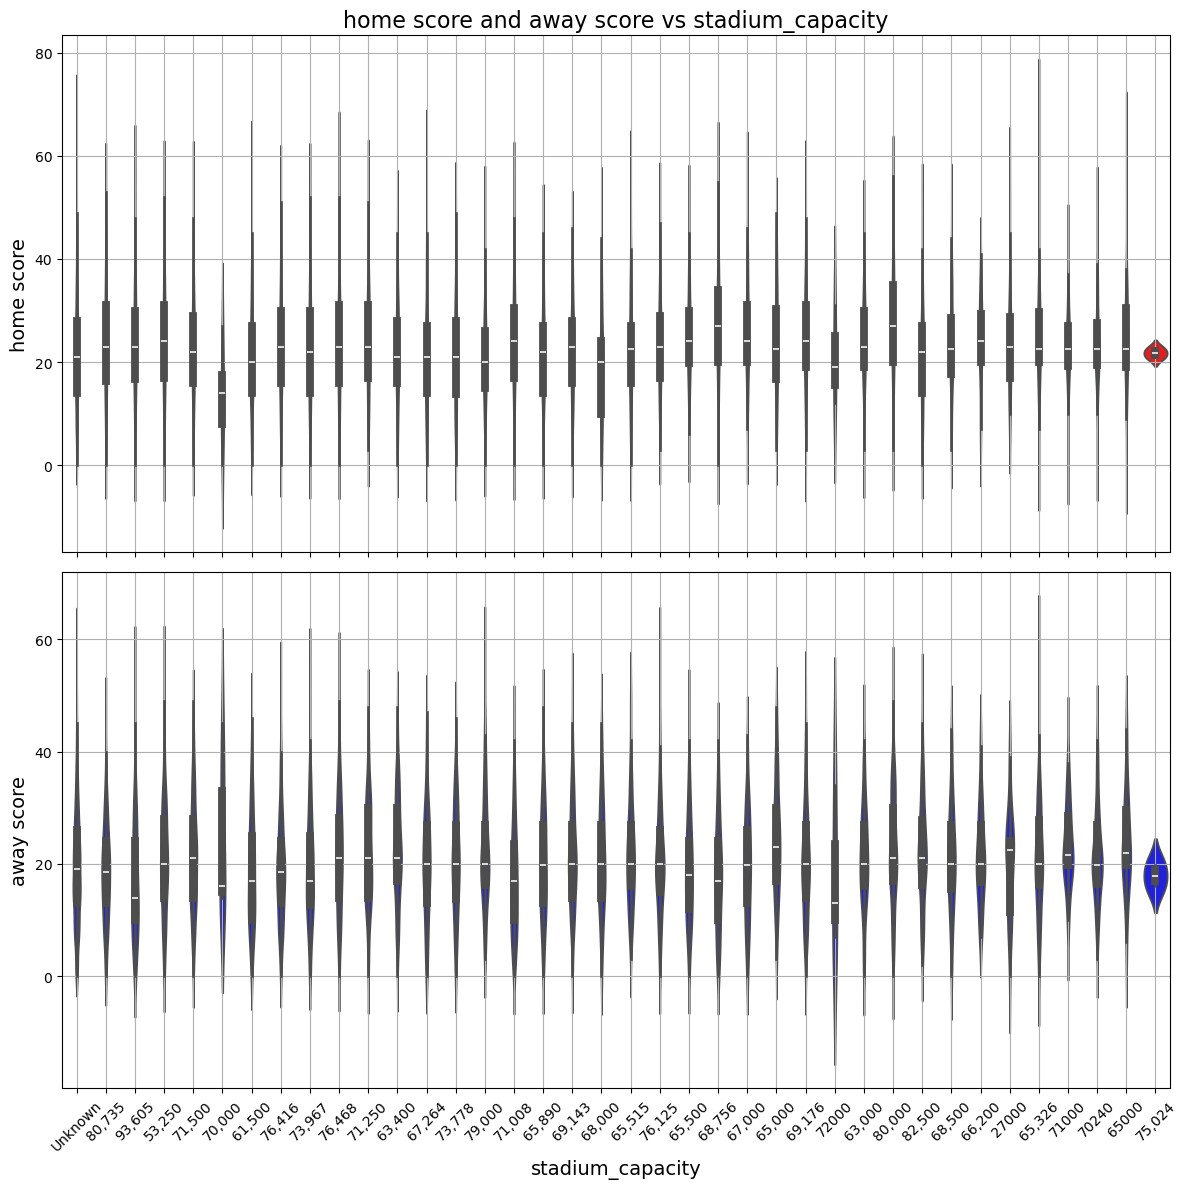

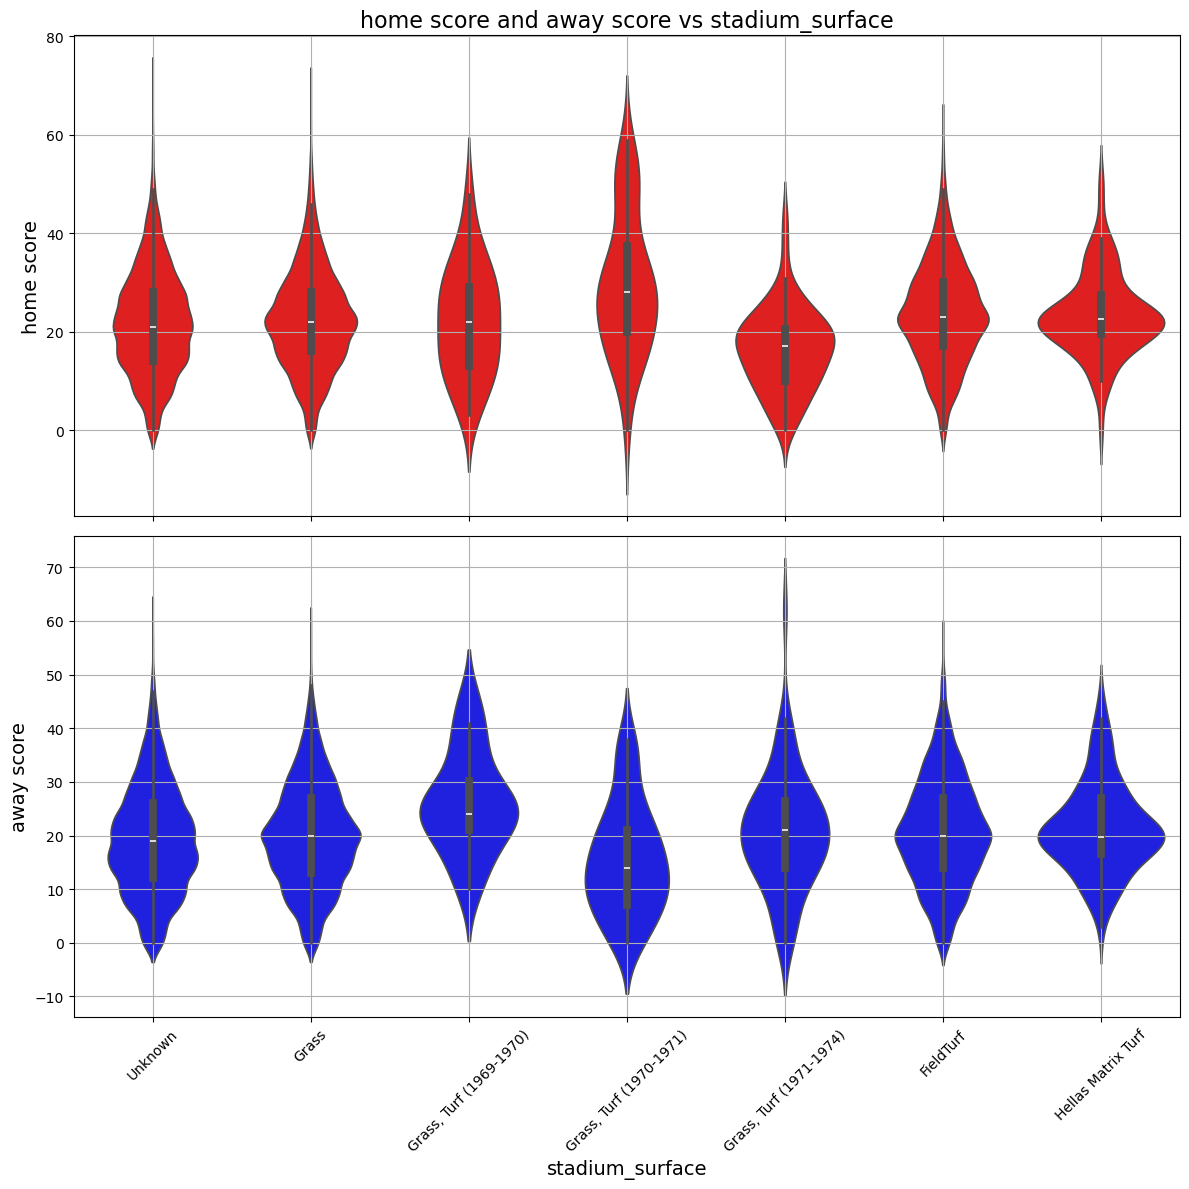

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_cat['score_home'] = nfl['score_home']
df_cat['score_away'] = nfl['score_away']

for feature in df_cat.columns:
    if feature != 'score_home' and feature != 'score_away':
        plt.figure(figsize=(12, 12))
        
        ax1 = plt.subplot(2, 1, 1)
        sns.violinplot(data=df_cat, x=feature, y='score_home', ax=ax1, color='red')
        ax1.set_title(f'home score and away score vs {feature}', fontsize=16)
        ax1.set_xlabel('')
        ax1.set_ylabel('home score', fontsize=14)
        ax1.set_xticklabels([])  # Remove x-axis tick labels for score_home plot
        ax1.grid(True)

        ax2 = plt.subplot(2, 1, 2)
        sns.violinplot(data=df_cat, x=feature, y='score_away', ax=ax2, color='blue')
        ax2.set_xlabel(feature, fontsize=14)
        ax2.set_ylabel('away score', fontsize=14)
        ax2.tick_params(axis='x', rotation=45)
        ax2.grid(True)
        
        plt.tight_layout()
        plt.show()


In [9]:
df_num.dtypes

score_home              float64
score_away              float64
spread_favorite         float64
over_under_line         float64
weather_temperature     float64
weather_wind_mph        float64
weather_humidity        float64
stadium_open            float64
stadium_close           float64
stadium_latitude        float64
stadium_longitude       float64
stadium_azimuthangle    float64
stadium_elevation       float64
dtype: object

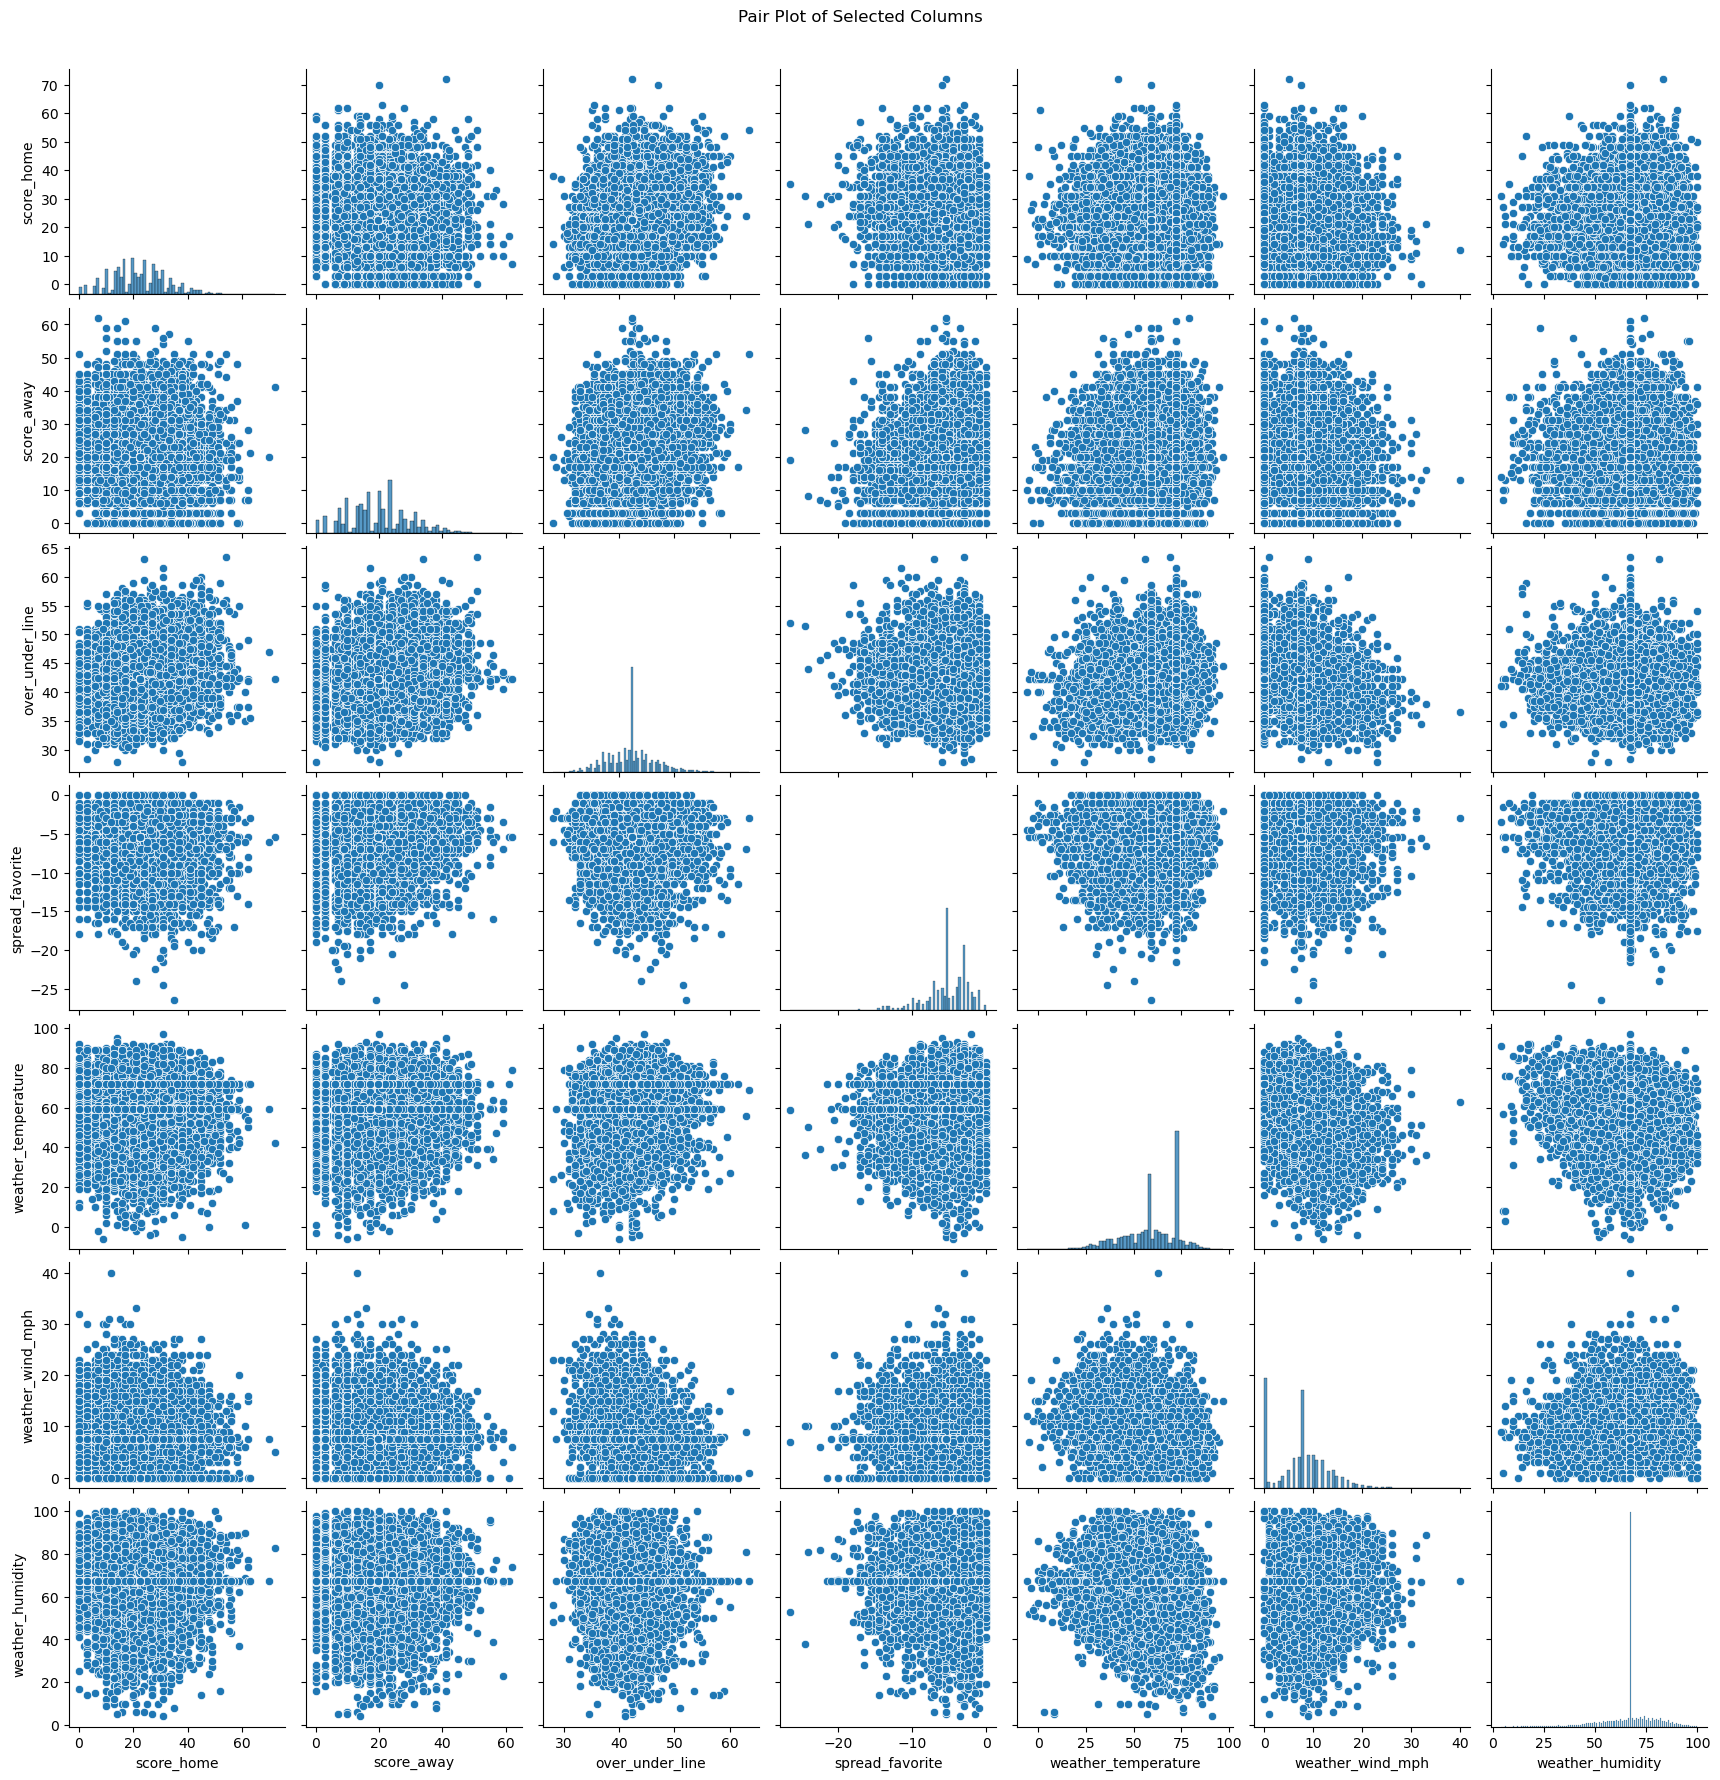

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns for the pair plot
columns_to_plot = ['score_home', 'score_away', 'over_under_line', 'spread_favorite', 'weather_temperature', 'weather_wind_mph', 'weather_humidity']

# Create a new DataFrame with only the selected columns
plot_df = nfl[columns_to_plot]

# Create the pair plot
sns.pairplot(plot_df)
plt.suptitle('Pair Plot of Selected Columns', y=1.02)
plt.show()


# Randon Forest Model

In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import time

# Measure runtime
start_time = time.time()

# Separate the last 271 rows for prediction
nfl_train = nfl.iloc[:-271]  
nfl_predict = nfl.iloc[-271:]  

# Convert categorical columns to numerical using one-hot encoding
nfl_train_encoded = pd.get_dummies(nfl_train)
nfl_predict_encoded = pd.get_dummies(nfl_predict)

# Ensure both training and prediction data have the same columns
nfl_predict_encoded = nfl_predict_encoded.reindex(columns=nfl_train_encoded.columns, fill_value=0)

X_train = nfl_train_encoded.drop(columns=['score_home', 'score_away'])  
y_train_home = nfl_train_encoded['score_home']  
y_train_away = nfl_train_encoded['score_away']  

X_predict = nfl_predict_encoded.drop(columns=['score_home', 'score_away'])  

rf_model_home = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_away = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_home.fit(X_train, y_train_home)
rf_model_away.fit(X_train, y_train_away)
predicted_home_scores = rf_model_home.predict(X_predict)
predicted_away_scores = rf_model_away.predict(X_predict)
nfl_predict['predicted_score_home'] = predicted_home_scores
nfl_predict['predicted_score_away'] = predicted_away_scores

# Calculate Mean Squared Error
mse_home = mean_squared_error(nfl_predict['score_home'], predicted_home_scores)
mse_away = mean_squared_error(nfl_predict['score_away'], predicted_away_scores)

# Measure runtime
end_time = time.time()
runtime = end_time - start_time

print(nfl_predict[['predicted_score_home', 'predicted_score_away']])
print(f"Mean Squared Error (Home Scores): {mse_home}")
print(f"Mean Squared Error (Away Scores): {mse_away}")
print(f"Runtime: {runtime:.2f} seconds")


#######  OUTPUT  #######
#   predicted_score_home  predicted_score_away
#   13801                 17.57                 20.50
#   13802                 19.12                 18.85
#   13803                 19.31                 19.86
#   13804                 23.37                 18.59
#   13805                 21.11                 16.22
#   ...                     ...                   ...
#   14067                 23.76                 19.86
#   14068                 16.41                 21.15
#   14069                 21.40                 21.36
#   14070                 19.96                 18.44
#   14071                 21.88                 18.90
#   
#   
#   
#   [271 rows x 2 columns]
#   Mean Squared Error (Home Scores): 6.841222137206541
#   Mean Squared Error (Away Scores): 2.8940572362235955
#   Runtime: 76.65 seconds



       predicted_score_home  predicted_score_away
13801                 17.57                 20.50
13802                 19.12                 18.85
13803                 19.31                 19.86
13804                 23.37                 18.59
13805                 21.11                 16.22
...                     ...                   ...
14067                 23.76                 19.86
14068                 16.41                 21.15
14069                 21.40                 21.36
14070                 19.96                 18.44
14071                 21.88                 18.90

[271 rows x 2 columns]
Mean Squared Error (Home Scores): 6.841222137206541
Mean Squared Error (Away Scores): 2.8940572362235955
Runtime: 77.36 seconds


/var/folders/xc/yrj64zn13bjfv7vdfm67_kb40000gn/T/ipykernel_10625/4112753878.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nfl_predict['predicted_score_home'] = predicted_home_scores
/var/folders/xc/yrj64zn13bjfv7vdfm67_kb40000gn/T/ipykernel_10625/4112753878.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nfl_predict['predicted_score_away'] = predicted_away_scores


## Predicted Scores

In [12]:
original_info = df.tail(271)[['schedule_date', 'team_home', 'team_away']].reset_index(drop=True)

# Combine the original info with predictions
result_df = pd.concat([original_info, nfl_predict[['predicted_score_home', 'predicted_score_away']].reset_index(drop=True)], axis=1)

result_df


schedule_date             team_home              team_away  \
0      2024-09-05    Kansas City Chiefs       Baltimore Ravens   
1      2024-09-08  Tampa Bay Buccaneers  Washington Commanders   
2      2024-09-08    Cincinnati Bengals   New England Patriots   
3      2024-09-08         Buffalo Bills      Arizona Cardinals   
4      2024-09-08  Los Angeles Chargers      Las Vegas Raiders   
..            ...                   ...                    ...   
266    2025-01-05    Indianapolis Colts   Jacksonville Jaguars   
267    2025-01-05         New York Jets         Miami Dolphins   
268    2025-01-05      Baltimore Ravens       Cleveland Browns   
269    2025-01-05     Green Bay Packers          Chicago Bears   
270    2025-01-05      Tennessee Titans         Houston Texans   

     predicted_score_home  predicted_score_away  
0                   17.57                 20.50  
1                   19.12                 18.85  
2                   19.31                 19.86  
3                   23.37                 18.59  
4                   21.11                 16.22  
..                    ...                   ...  
266                 23.76                 19.86  
267                 16.41                 21.15  
268                 21.40                 21.36  
269                 19.96                 18.44  
270                 21.88                 18.90  

[271 rows x 5 columns]

## Plot of Predicted Scores

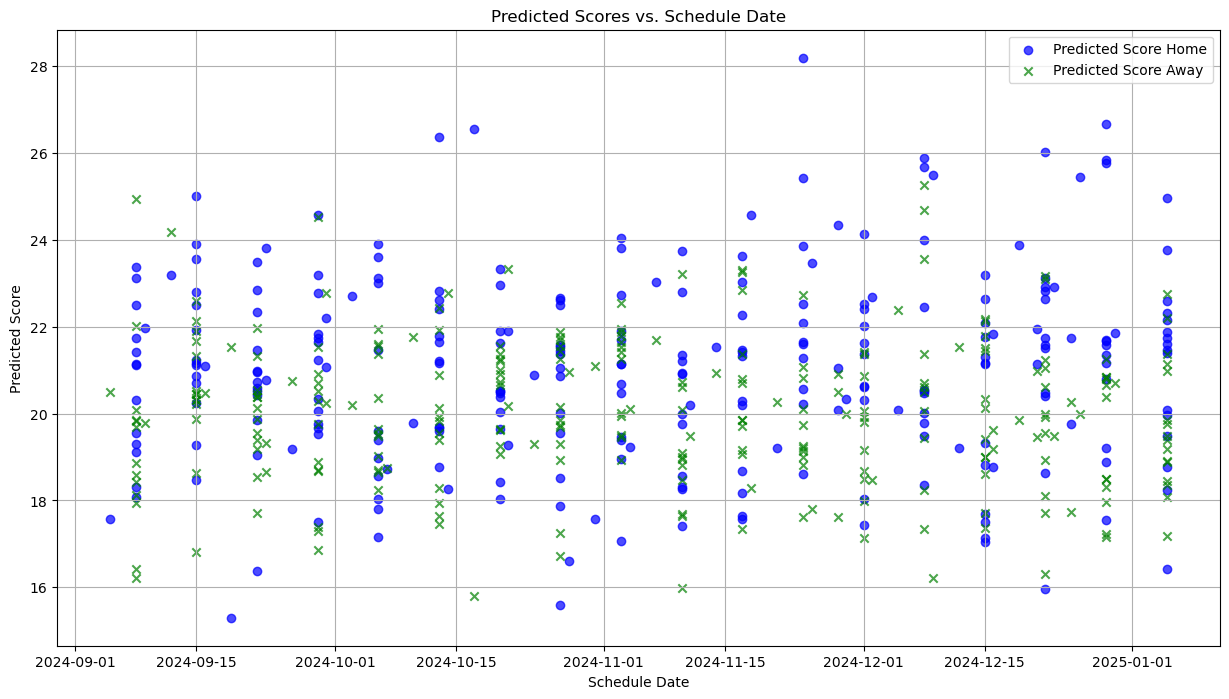

In [13]:

plt.figure(figsize=(15, 8))
plt.scatter(result_df['schedule_date'], result_df['predicted_score_home'], label='Predicted Score Home', color='blue', marker='o', alpha=0.7)
plt.scatter(result_df['schedule_date'], result_df['predicted_score_away'], label='Predicted Score Away', color='green', marker='x', alpha=0.7)

plt.title('Predicted Scores vs. Schedule Date')
plt.xlabel('Schedule Date')
plt.ylabel('Predicted Score')
plt.legend()
plt.grid(True)

plt.show()


## Residuals Distribution

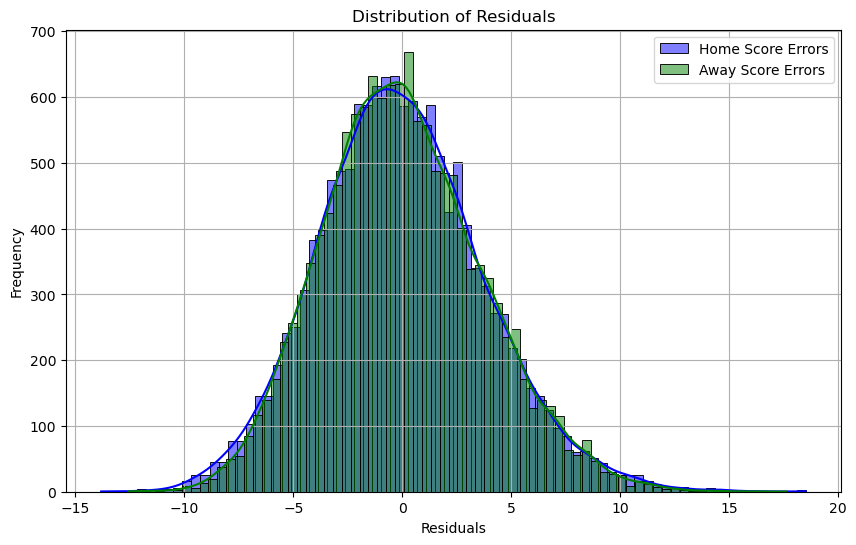

In [14]:
errors_home = y_train_home - rf_model_home.predict(X_train)
errors_away = y_train_away - rf_model_away.predict(X_train)

plt.figure(figsize=(10, 6))
sns.histplot(errors_home, color='blue', label='Home Score Errors', kde=True)
sns.histplot(errors_away, color='green', label='Away Score Errors', kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.legend()
plt.grid(True)
plt.show()


## Predicted vs Training Data

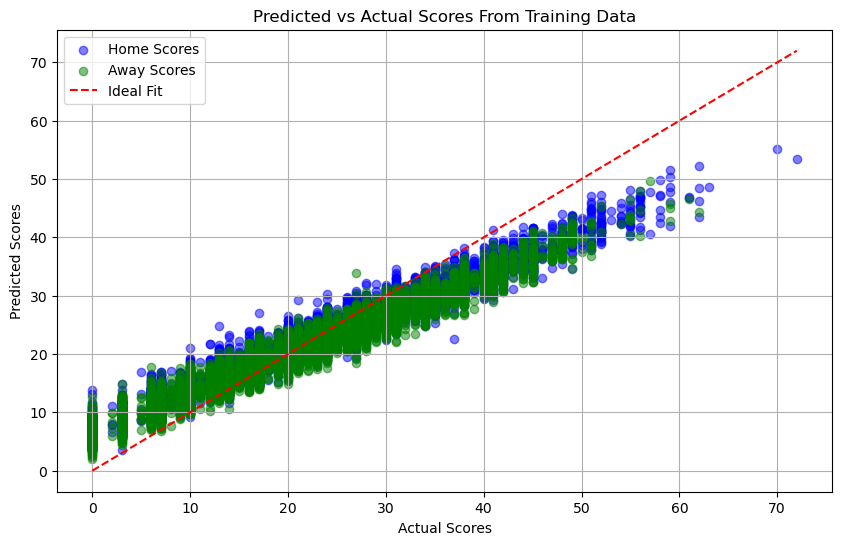

In [15]:
import matplotlib.pyplot as plt

# Assuming you have actual scores in `nfl_train` for training predictions
plt.figure(figsize=(10, 6))
plt.scatter(nfl_train['score_home'], rf_model_home.predict(X_train), alpha=0.5, color='blue', label='Home Scores')
plt.scatter(nfl_train['score_away'], rf_model_away.predict(X_train), alpha=0.5, color='green', label='Away Scores')
plt.plot([nfl_train['score_home'].min(), nfl_train['score_home'].max()], [nfl_train['score_home'].min(), nfl_train['score_home'].max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Predicted vs Actual Scores From Training Data')
plt.legend()
plt.grid(True)
plt.show()


## Distribution of Scores

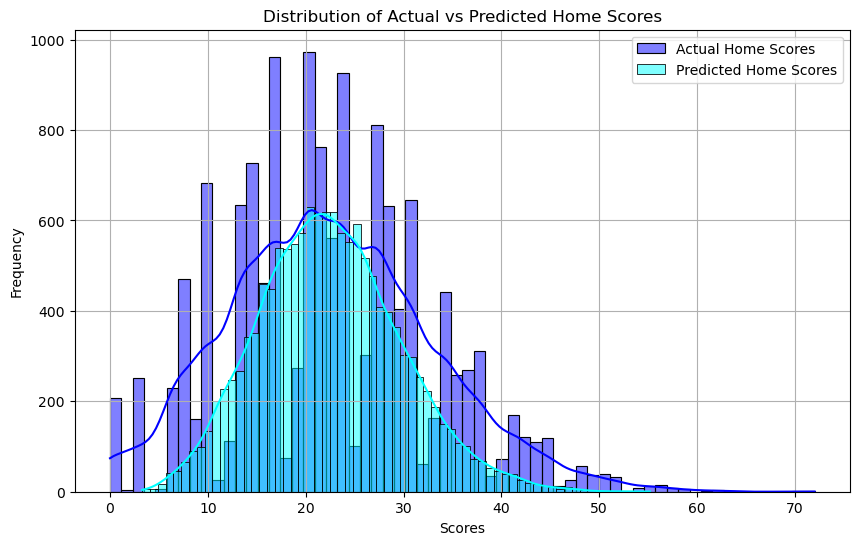

In [16]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(nfl_train['score_home'], color='blue', label='Actual Home Scores', kde=True)
sns.histplot(rf_model_home.predict(X_train), color='cyan', label='Predicted Home Scores', kde=True)
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs Predicted Home Scores')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
nfl_predict

team_home team_conference team_division  \
13801    Kansas City Chiefs             AFC      AFC West   
13802  Tampa Bay Buccaneers             NFC     NFC South   
13803    Cincinnati Bengals             AFC     AFC North   
13804         Buffalo Bills             AFC      AFC East   
13805  Los Angeles Chargers             AFC      AFC West   
...                     ...             ...           ...   
14067    Indianapolis Colts             AFC     AFC South   
14068         New York Jets             NFC      AFC East   
14069      Baltimore Ravens             AFC     AFC North   
14070     Green Bay Packers             NFC     NFC North   
14071      Tennessee Titans             AFC     AFC South   

      team_conference_pre2002 team_division_pre2002 schedule_week  \
13801                     AFC              AFC West             1   
13802                     NFC           NFC Central             1   
13803                     AFC           AFC Central             1   
13804                     AFC              AFC East             1   
13805                     AFC              AFC West             1   
...                       ...                   ...           ...   
14067                     AFC              AFC East            18   
14068                     NFC              AFC East            18   
14069                     AFC           AFC Central            18   
14070                     NFC           NFC Central            18   
14071                     AFC           AFC Central            18   

                   team_away team_favorite_id  \
13801       Baltimore Ravens          Unknown   
13802  Washington Commanders          Unknown   
13803   New England Patriots          Unknown   
13804      Arizona Cardinals          Unknown   
13805      Las Vegas Raiders          Unknown   
...                      ...              ...   
14067   Jacksonville Jaguars          Unknown   
14068         Miami Dolphins          Unknown   
14069       Cleveland Browns          Unknown   
14070          Chicago Bears          Unknown   
14071         Houston Texans          Unknown   

                               stadium weather_detail  ... stadium_close  \
13801  GEHA Field at Arrowhead Stadium        Unknown  ...   2002.689877   
13802            Raymond James Stadium        Unknown  ...   2016.000000   
13803                   Paycor Stadium        Unknown  ...   2002.689877   
13804                 Highmark Stadium        Unknown  ...   2002.689877   
13805                     SoFi Stadium         indoor  ...   2002.689877   
...                                ...            ...  ...           ...   
14067                Lucas Oil Stadium         indoor  ...   2002.689877   
14068                  MetLife Stadium        Unknown  ...   2002.689877   
14069                 M&T Bank Stadium        Unknown  ...   2002.689877   
14070                    Lambeau Field        Unknown  ...   2002.689877   
14071                   Nissan Stadium        Unknown  ...   2016.000000   

      stadium_latitude stadium_longitude stadium_azimuthangle  \
13801        39.048889        -94.483889           316.300000   
13802        27.975833        -82.503333             0.000000   
13803        39.100000        -84.516670           192.485631   
13804        42.889000        -78.890100           192.485631   
13805        33.953450       -118.339200           338.200000   
...                ...               ...                  ...   
14067        39.760056        -86.162806            26.600000   
14068        40.813528        -74.074361           345.500000   
14069        39.278056        -76.622778           289.500000   
14070        44.501389        -88.062222             0.000000   
14071        36.166389        -86.771389           334.600000   

      stadium_elevation  schedule_season  schedule_playoff  stadium_neutral  \
13801        264.900000             2024                 0                0   
13802          